In [20]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from prettytable import PrettyTable as ptbl

# Defining Methods

In [21]:
def JacobiMethod(a,x,B,N,E):
    
    # Copying input arguments into local arguments to avoid data Over-writing
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)

    print("\n***** Jacobi Method *****")
    condition = True
    
    count = 0
    
    # List to hold column titles for Making table
    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('x'+str(i+1))
    
    # List to hold data which is to be displayed in table
    outputlist=[]

    # List to hold data which is to be used to plot graph i.e. iteration count and corresponding accuracy
    accuracy = []

    while condition:

        X_new = np.zeros((n))
        for i in range(n):
            tmp = 0
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (b[i] - tmp)/A[i][i]
        
        print(f'iteration = {count}',end="\t")

        temp = []
        temp.append(count+1)    
        for i in range(n):
            print(f'   X{i+1} = {X_new[i]:.6f}', end = "\t")
            temp.append(X_new[i])
        print()
        outputlist.append(temp)             # Adding data to outputlist (for making table)
        
        accuracyReached = abs(X_new[0] - X[0])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X[i])) 

        accuracy.append([count+1,accuracyReached])      # Adding data to accuracy list (for plotting graphs)
        
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True

    # Making Table and pushing data in it    
    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)
    
    # Printing Result
    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]:.6f}', end = "\t")
    print()
    return accuracy,table

In [22]:
def GaussSiedelMethod(a,x,B,N,E):
    
    # Copying input arguments into local arguments to avoid data Over-writing
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)
    
    print("\n***** Gauss-Siedel Method *****")

    # List to hold column titles for Making table
    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('x'+str(i+1))
    
    # List to hold data which is to be displayed in table
    outputlist=[]

    condition = True
    count = 0
    
    # List to hold data which is to be used to plot graph i.e. iteration count and corresponding accuracy
    accuracy = []

    while condition:
        X_prev = copy.copy(X)
        X_new = np.zeros((n))
        for i in range(n):
            
            for j in range (i):
                X[j] = copy.copy(X_new[j])
            
            tmp = 0
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (b[i] - tmp)/A[i][i]
            
        temp = []
        temp.append(count+1)
        print(f'iteration = {count}',end="\t")
        for i in range(n):
            print(f'  X{i+1} = {X_new[i]:.6f}', end = "\t")
            temp.append(X_new[i])
        print()
        
        outputlist.append(temp)         # Adding data to outputlist (for making table)
        
        accuracyReached = abs(X_new[i] - X_prev[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X_prev[i])) 
        
        accuracy.append([count+1,accuracyReached])      # Adding data to accuracy list (for plotting graphs)
                
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True

    # Making Table and pushing data in it
    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)

    # Printing Result
    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]:.6f}', end = "\t")
    print()

    return accuracy, table

In [23]:
def SOR(a,x,B,N,E,W = 1.0):
    
    # Copying input arguments into local arguments to avoid data Over-writing
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)
    w = copy.copy(W)

    print("\n***** Succesive Over Relaxation *****")

    # List to hold column titles for Making table
    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('x'+str(i+1))
    
    # List to hold data which is to be displayed in table
    outputlist=[]
    
    # List to hold data which is to be used to plot graph i.e. iteration count and corresponding accuracy
    accuracy = []
    
    condition = True
    count = 0

    while condition:
        X_prev = copy.copy(X)
        X_new = np.zeros((n))
        for i in range(n):
            for j in range (i):
                X[j] = X_new[j]
            
            tmp = 0
            n = len(A)
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
    
            X_new[i] = (1-w)*X_prev[i] + w*((b[i] - tmp)/A[i][i])
            
        temp = []
        temp.append(count+1)
        # Displaying iteration data and adding it to a local list so that local list can then 
        print(f'iteration = {count}',end="\t")
        for i in range(n):
            print(f'  x{i+1} = {X_new[i]:.6f}', end = "\t")
            temp.append(X_new[i])
        print()
        outputlist.append(temp)         # Adding data to outputlist (for making table)

        accuracyReached = abs(X_new[i] - X_prev[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X_prev[i]))
        
        accuracy.append([count+1,accuracyReached])          # Adding data to accuracy list (for plotting graphs)
        
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True
    
    # Making Table and pushing data in it
    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)

    # Printing Result
    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]:.6f}', end = "\t")
    print()

    return accuracy, table

# Input Section


In [24]:
n = 3
# A = np.array([[-10.,-8.,0.],
#             [-8.,10.,-1.,],
#             [0.,-1.,10.]
#             ])

# b = np.array([-6.,9.,28.])

# A = np.array([[3.,-1.,1.],
#             [-1.,3.,-1.],
#             [1.,-1.,3]
#             ])

# b = np.array([
#     [-1.],
#     [7.],
#     [-7.]
# ])

A = np.array([[10.,-1.,0.],
            [-1.,10.,-2.],
            [0.,-2.,10.]
            ])
            
b = np.array([
    [9.],
    [7.],
    [6.]
])

# initial Guesses
X = np.array([0.,0.,0.])

# Reading tolerable error
e = 0.0001


# Reading relaxation factor
w = 7/10

## Taking input from user 


n = int(input("Enter Number of Variables: "))

A = np.zeros((n,n))
print("Enter Co-efficient Matrix:")
for i in range(n):
    for j in range(n):
        A[i][j] = float(input(">"))

b = np.zeros((n))
print("Enter RHS: ")
for i in range(n):
    b[i] = float(input(">"))

X = np.zeros((n))
print("Enter Initial Guasses:")
for i in range(n):
    b[i] = float(input(">"))
    
e = float(input('Enter Accuracy: '))

# Calling Methods

## Jacobi Method

In [25]:
jacobi, table = JacobiMethod(A,X,b,n,e)
jacobi_count = []
jacobi_accuracy = []
for i in jacobi:
        jacobi_count.append(i[0])
        jacobi_accuracy.append(i[1])


***** Jacobi Method *****
iteration = 0	   X1 = 0.900000	   X2 = 0.700000	   X3 = 0.600000	
iteration = 1	   X1 = 0.970000	   X2 = 0.910000	   X3 = 0.740000	
iteration = 2	   X1 = 0.991000	   X2 = 0.945000	   X3 = 0.782000	
iteration = 3	   X1 = 0.994500	   X2 = 0.955500	   X3 = 0.789000	
iteration = 4	   X1 = 0.995550	   X2 = 0.957250	   X3 = 0.791100	
iteration = 5	   X1 = 0.995725	   X2 = 0.957775	   X3 = 0.791450	
iteration = 6	   X1 = 0.995777	   X2 = 0.957862	   X3 = 0.791555	
iteration = 7	   X1 = 0.995786	   X2 = 0.957889	   X3 = 0.791573	

Solution: Iteration = 8
x1 = 0.995786	x2 = 0.957889	x3 = 0.791573	


In [26]:
print("Jacobi Method:")
print(table)

Jacobi Method:
+-----------+--------------------+--------------------+--------------------+
| Iteration |         X1         |         X2         |         X3         |
+-----------+--------------------+--------------------+--------------------+
|     1     |        0.9         |        0.7         |        0.6         |
|     2     |        0.97        | 0.9099999999999999 |        0.74        |
|     3     |       0.991        |       0.945        |       0.782        |
|     4     |       0.9945       |       0.9555       | 0.7889999999999999 |
|     5     |      0.99555       | 0.9572499999999999 | 0.7910999999999999 |
|     6     |      0.995725      |      0.957775      |      0.79145       |
|     7     |     0.9957775      | 0.9578624999999998 |      0.791555      |
|     8     | 0.9957862499999999 | 0.9578887500000001 |     0.7915725      |
+-----------+--------------------+--------------------+--------------------+


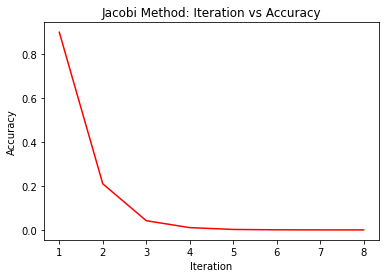

In [27]:
plt.title("Jacobi Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(jacobi_count,jacobi_accuracy,color = 'red')
plt.show()

## Gauss Siedel Method

In [28]:
gs,table = GaussSiedelMethod(A,X,b,n,e)

gs_count = []
gs_accuracy =[] 
for i in gs:
    gs_count.append(i[0])
    gs_accuracy.append(i[1])


***** Gauss-Siedel Method *****
iteration = 0	  X1 = 0.900000	  X2 = 0.790000	  X3 = 0.758000	
iteration = 1	  X1 = 0.979000	  X2 = 0.949500	  X3 = 0.789900	
iteration = 2	  X1 = 0.994950	  X2 = 0.957475	  X3 = 0.791495	
iteration = 3	  X1 = 0.995748	  X2 = 0.957874	  X3 = 0.791575	
iteration = 4	  X1 = 0.995787	  X2 = 0.957894	  X3 = 0.791579	

Solution: Iteration = 5
x1 = 0.995787	x2 = 0.957894	x3 = 0.791579	


In [29]:
print("Gauss Siedel Method:")
print(table)

Gauss Siedel Method:
+-----------+--------------------+--------------------+--------------------+
| Iteration |         X1         |         X2         |         X3         |
+-----------+--------------------+--------------------+--------------------+
|     1     |        0.9         |        0.79        |       0.758        |
|     2     | 0.9789999999999999 | 0.9495000000000001 |       0.7899       |
|     3     |      0.99495       |      0.957475      | 0.7914950000000001 |
|     4     |     0.9957475      | 0.9578737499999999 |     0.79157475     |
|     5     | 0.9957873749999999 |    0.9578936875    |    0.7915787375    |
+-----------+--------------------+--------------------+--------------------+


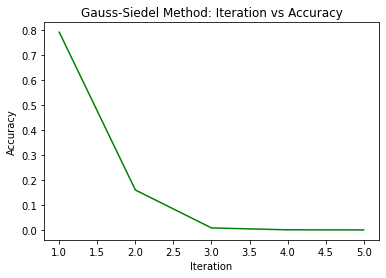

In [30]:
plt.title("Gauss-Siedel Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(gs_count,gs_accuracy,color = 'green')
plt.show()

## Succesive Over Relaxation Method

In [31]:
w = 0.9

sor, table = SOR(A,X,b,n,e,w)
sor_count = []
sor_accuracy = []
for i in sor:
    sor_count.append(i[0])
    sor_accuracy.append(i[1])


***** Succesive Over Relaxation *****
iteration = 0	  x1 = 0.810000	  x2 = 0.702900	  x3 = 0.666522	
iteration = 1	  x1 = 0.954261	  x2 = 0.906147	  x3 = 0.769759	
iteration = 2	  x1 = 0.986979	  x2 = 0.947999	  x3 = 0.787616	
iteration = 3	  x1 = 0.994018	  x2 = 0.956032	  x3 = 0.790847	
iteration = 4	  x1 = 0.995445	  x2 = 0.957546	  x3 = 0.791443	
iteration = 5	  x1 = 0.995724	  x2 = 0.957829	  x3 = 0.791554	
iteration = 6	  x1 = 0.995777	  x2 = 0.957883	  x3 = 0.791574	

Solution: Iteration = 7
x1 = 0.995777	x2 = 0.957883	x3 = 0.791574	


In [32]:
print("Successive Over Relaxation Method:")
print(table)

Successive Over Relaxation Method:
+-----------+--------------------+--------------------+--------------------+
| Iteration |         X1         |         X2         |         X3         |
+-----------+--------------------+--------------------+--------------------+
|     1     |        0.81        | 0.7029000000000001 | 0.6665220000000001 |
|     2     | 0.9542609999999999 |     0.90614745     |    0.769758741     |
|     3     |    0.9869793705    | 0.9479994617249999 | 0.7876157772104999 |
|     4     | 0.9940178886052501 | 0.9560323960448625 | 0.7908474090091252 |
|     5     | 0.9954447045045627 | 0.9575457966315394 | 0.7914429842945896 |
|     6     | 0.9957235921472948 | 0.9578294401294366 | 0.7915535976527576 |
|     7     | 0.9957770088263789 | 0.9578825223848142 | 0.7915742137945423 |
+-----------+--------------------+--------------------+--------------------+


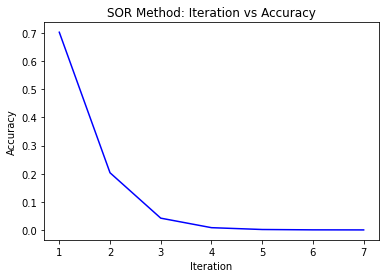

In [33]:
plt.title("SOR Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(sor_count,sor_accuracy,color = 'blue')
plt.show()

# Combined Plot

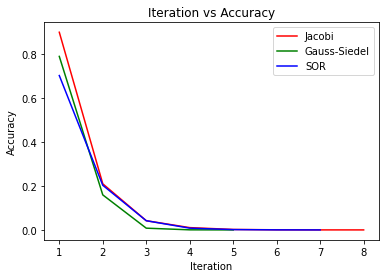

In [34]:
plt.title("Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(jacobi_count,jacobi_accuracy,color = 'red', label = 'Jacobi')
plt.plot(gs_count,gs_accuracy,color = 'green', label = 'Gauss-Siedel')
plt.plot(sor_count,sor_accuracy,color = 'blue', label = 'SOR')
plt.legend(loc="upper right")
plt.show()